In [34]:
import pandas as pd
import numpy as np

from prophet import Prophet

import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("data/ngp_20.csv")

In [12]:
df.shape

(5029, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5029 non-null   object 
 1   High       5029 non-null   float64
 2   Low        5029 non-null   float64
 3   Open       5029 non-null   float64
 4   Close      5029 non-null   float64
 5   Volume     5029 non-null   float64
 6   Adj Close  5029 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.1+ KB


In [14]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,4.709607,4.497694,4.603121,4.599679,106129.906542,4.599679
std,2.351606,2.225426,2.286553,2.286424,62496.762274,2.286424
min,1.567000,1.432000,1.441000,1.482000,0.000000,1.482000
25%,2.931000,2.824000,2.877000,2.876000,50537.000000,2.876000
50%,4.039000,3.885000,3.959000,3.959000,102002.000000,3.959000
75%,5.990000,5.710000,5.844000,5.825000,146875.000000,5.825000
max,15.780000,14.851000,15.160000,15.378000,459196.000000,15.378000


In [15]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-08-05,2.860,2.670,2.73,2.670,40412.0,2.670
1,2002-08-06,2.745,2.671,2.72,2.716,27302.0,2.716
2,2002-08-07,2.745,2.640,2.66,2.660,33427.0,2.660
3,2002-08-08,2.810,2.666,2.68,2.745,46659.0,2.745
4,2002-08-09,2.800,2.749,2.76,2.761,23867.0,2.761


In [16]:
data = df[['Date', 'Close']]

In [17]:
data.head()

,Date,Close
0,2002-08-05,2.670
1,2002-08-06,2.716
2,2002-08-07,2.660
3,2002-08-08,2.745
4,2002-08-09,2.761


In [23]:
data = data.rename(columns = {'Date':'ds', 'Close':'y'})

In [24]:
model = Prophet(interval_width=0.95, daily_seasonality=True)
model_fit = model.fit(data)

11:01:15 - cmdstanpy - INFO - Chain [1] start processing
11:01:18 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
future = model.make_future_dataframe(periods=365*5, freq='D')
forecasts = model.predict(future)

In [62]:
forecasts.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-08-05,2.926556,2.086942,6.262861,2.926556,2.926556,1.203838,1.203838,1.203838,1.297934,...,0.054023,0.054023,0.054023,-0.148119,-0.148119,-0.148119,0.0,0.0,0.0,4.130395
1,2002-08-06,2.929145,2.055528,6.039943,2.929145,2.929145,1.203164,1.203164,1.203164,1.297934,...,0.069103,0.069103,0.069103,-0.163874,-0.163874,-0.163874,0.0,0.0,0.0,4.132308
2,2002-08-07,2.931733,2.219685,6.465472,2.931733,2.931733,1.198901,1.198901,1.198901,1.297934,...,0.080230,0.080230,0.080230,-0.179263,-0.179263,-0.179263,0.0,0.0,0.0,4.130634
3,2002-08-08,2.934321,2.033250,6.019268,2.934321,2.934321,1.169472,1.169472,1.169472,1.297934,...,0.065662,0.065662,0.065662,-0.194124,-0.194124,-0.194124,0.0,0.0,0.0,4.103793
4,2002-08-09,2.936910,2.071752,6.136956,2.936910,2.936910,1.145084,1.145084,1.145084,1.297934,...,0.055465,0.055465,0.055465,-0.208314,-0.208314,-0.208314,0.0,0.0,0.0,4.081994


In [63]:
preds = forecasts[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

In [64]:
actual = pd.Series(data['y'], index=data['ds'])

In [65]:
def plot_moving_avg(actual, series):    
    fig, ax = plt.subplots()
    ax.set_title('Base Line Scores')
    ax.plot(series['yhat'], label='Prophet')
    
    ax.fill_between(series.index, series['yhat_lower'], series['yhat_upper'], alpha=0.2)

    #ax.plot(actual, label='Actual values')
    ax.legend(loc='best')
    ax.grid(True)

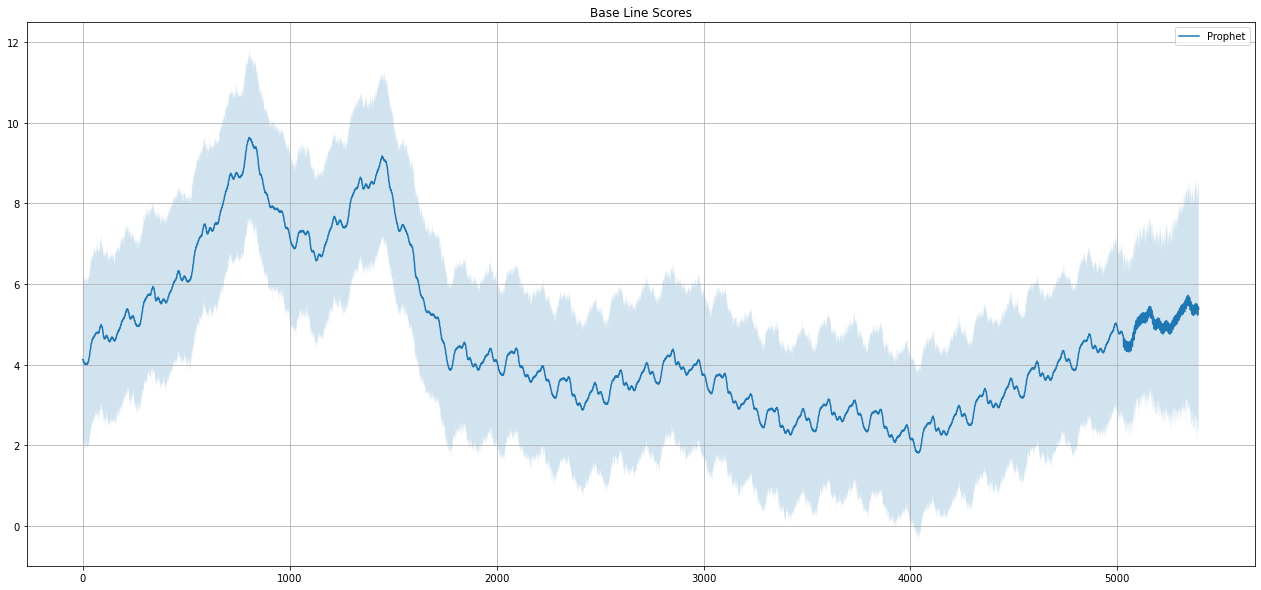

In [57]:
plt.rcParams.update({'figure.figsize': (22,10)})
plot_moving_avg(data['y'], preds)

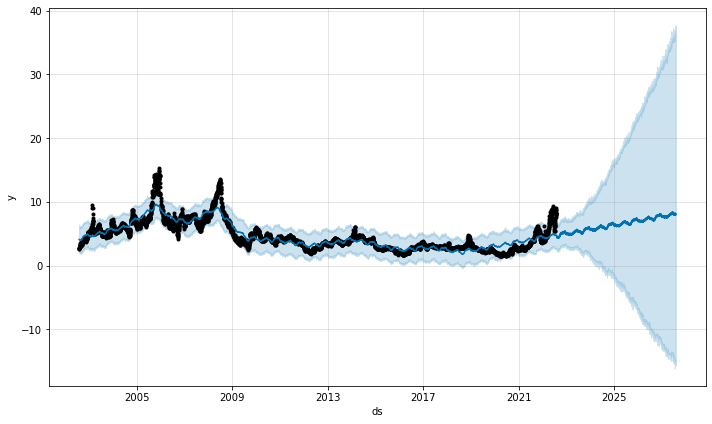

In [69]:
fig1 = model.plot(forecasts)

In [67]:
forecasts.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6849,2027-07-30,6.871506,-14.724438,36.823964,-16.279622,35.703461,1.299947,1.299947,1.299947,1.297934,...,0.055465,0.055465,0.055465,-0.053452,-0.053452,-0.053452,0.0,0.0,0.0,8.171453
6850,2027-07-31,6.873370,-15.411114,35.877628,-16.289759,35.741710,1.068639,1.068639,1.068639,1.297934,...,-0.162242,-0.162242,-0.162242,-0.067053,-0.067053,-0.067053,0.0,0.0,0.0,7.942009
6851,2027-08-01,6.875235,-15.620395,37.708741,-16.305456,35.774954,1.054167,1.054167,1.054167,1.297934,...,-0.162242,-0.162242,-0.162242,-0.081525,-0.081525,-0.081525,0.0,0.0,0.0,7.929402
6852,2027-08-02,6.877099,-15.609339,36.959287,-16.321225,35.808198,1.255282,1.255282,1.255282,1.297934,...,0.054023,0.054023,0.054023,-0.096675,-0.096675,-0.096675,0.0,0.0,0.0,8.132381
6853,2027-08-03,6.878963,-14.798630,37.476179,-16.336995,35.841441,1.254738,1.254738,1.254738,1.297934,...,0.069103,0.069103,0.069103,-0.112299,-0.112299,-0.112299,0.0,0.0,0.0,8.133702
